In [1]:
from tensorflow import keras

2025-09-06 10:11:09.271364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757153469.480651      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757153469.544083      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
(train_X, train_y), (test_X,test_y) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(f"Type of train_images: {type(train_y)}")
print(f"Shape of train_images: {train_y.shape}")

Type of train_images: <class 'numpy.ndarray'>
Shape of train_images: (60000,)


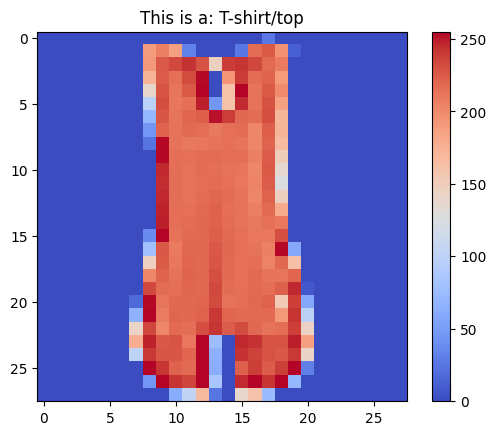

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample =4
plt.figure()
plt.imshow(train_X[sample], cmap='coolwarm')
plt.colorbar()
plt.grid(False)
plt.title(f"This is a: {class_names[train_y[sample]]}")
plt.show()

In [5]:
train_X = train_X.reshape((60000,28,28,1))
test_X =test_X.reshape((10000,28,28,1))

In [75]:
generator = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
)


inputs = keras.Input(shape=(28, 28, 1))


x = keras.layers.Conv2D(64, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Dropout(0.25)(x)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [77]:

history = model.fit(
    generator.flow(train_X,train_y,batch_size=32),
    validation_data=(test_X, test_y),
    epochs = 50,
    callbacks = [EarlyStopping(
        monitor='val_accuracy',  
        patience=15,
        mode='max',          
        verbose=1,           
        restore_best_weights=True 
    )],
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.4460 - loss: 2.4173 - val_accuracy: 0.7450 - val_loss: 0.6475
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.6891 - loss: 0.8234 - val_accuracy: 0.7820 - val_loss: 0.5552
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7147 - loss: 0.7475 - val_accuracy: 0.7880 - val_loss: 0.5265
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7313 - loss: 0.7035 - val_accuracy: 0.7887 - val_loss: 0.5253
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7363 - loss: 0.6873 - val_accuracy: 0.7978 - val_loss: 0.5439
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7469 - loss: 0.6568 - val_accuracy: 0.8088 - val_loss: 0.5499
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7555 - loss: 0.6411 - val_accuracy: 0.8012 - val_loss: 0.5086
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7531 - loss: 0.63

In [78]:
model.evaluate(x=test_X, y=test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8412 - loss: 0.4465


[0.44128867983818054, 0.8389000296592712]

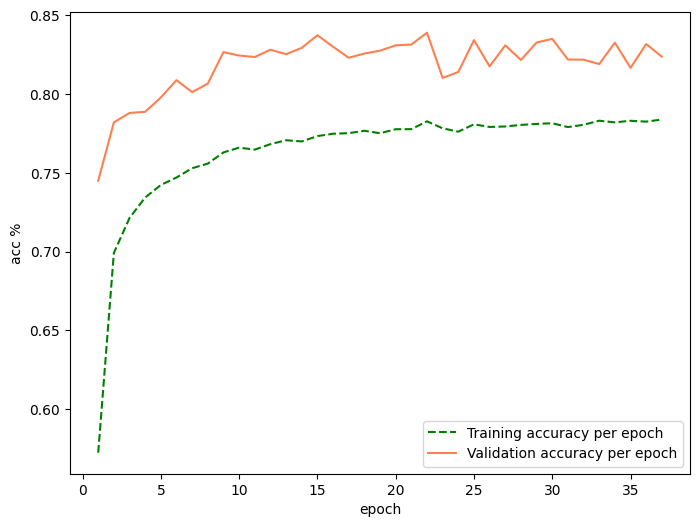

In [80]:
plt.figure(figsize=(8,6))
epc = np.arange(1,38)
plt.plot(epc,history.history['accuracy'],label = 'Training accuracy per epoch', color = 'green',linestyle='--')
plt.plot(epc,history.history['val_accuracy'],label = 'Validation accuracy per epoch', color = 'coral',linestyle='-')
plt.xlabel('epoch')
plt.ylabel('acc %')
plt.legend()
plt.show()

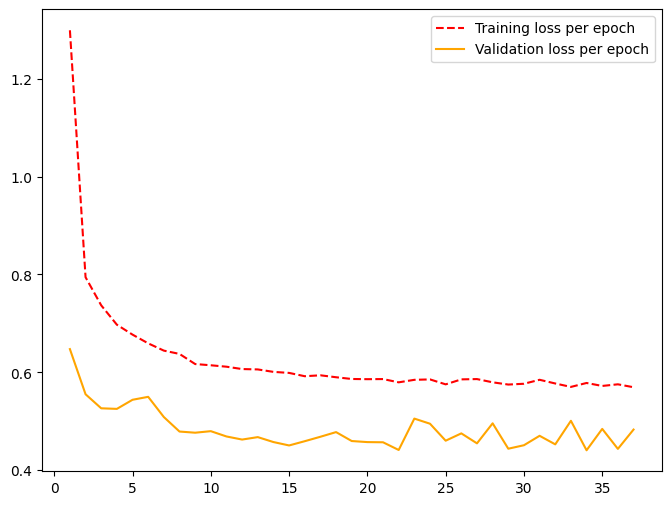

In [81]:
plt.figure(figsize=(8,6))
plt.plot(epc,history.history['loss'],label = 'Training loss per epoch', color = 'red',linestyle='--')
plt.plot(epc,history.history['val_loss'],label = 'Validation loss per epoch', color = 'orange',linestyle='-')
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn

In [83]:
y_pred = model.predict(test_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [84]:
y_pred = y_pred.argmax(axis=1)

Text(95.72222222222221, 0.5, 'predicted')

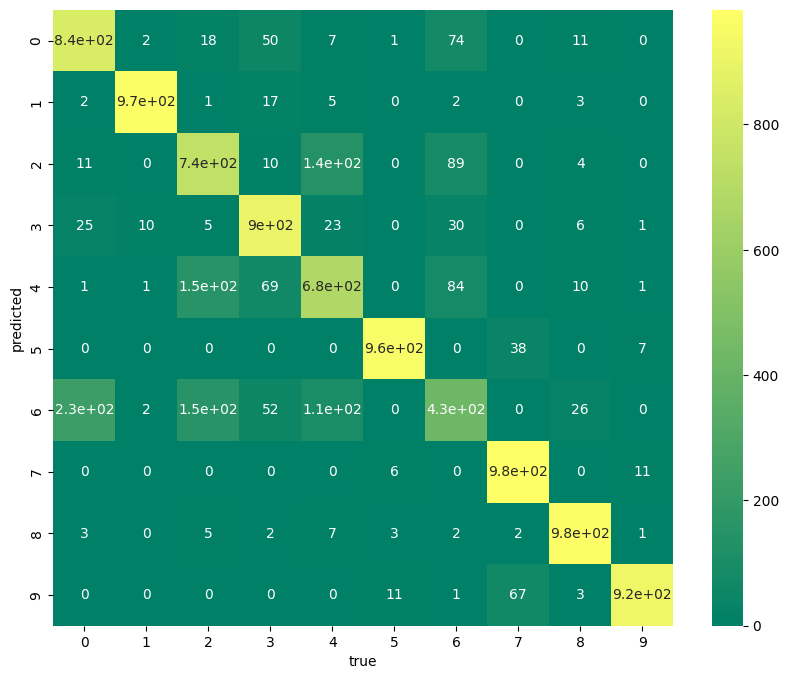

In [85]:
cmx = confusion_matrix(test_y,y_pred)
cmx
plt.figure(figsize=(10,8))
seaborn.heatmap(data = cmx,annot=True,cmap = 'summer')
plt.xlabel('true')
plt.ylabel('predicted')